In [ ]:
#EJERCICIO 1
# cargar librerÌas-----------------------------------------------
import pandas as pd
import os, sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import io

# cargar base----------------------------------------------------

url = 'https://raw.githubusercontent.com/ninelUNIR/ejemplos/main/mb.csv'
mb = pd.read_csv(url)

# info de la base------------------------------------------------
print(mb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   alanine                1175 non-null   float64
 1   creatin.phosphate      1175 non-null   float64
 2   creatine               1175 non-null   float64
 3   cysteine               1175 non-null   float64
 4   glutamine              1175 non-null   float64
 5   n.acetylglutamine      1175 non-null   float64
 6   proline                1175 non-null   float64
 7   tryptophan             1175 non-null   float64
 8   tyrosine               1175 non-null   float64
 9   isoleucine             1175 non-null   float64
 10  leucine                1175 non-null   float64
 11  valine                 1175 non-null   float64
 12  fa.ch2ch2co            1175 non-null   float64
 13  fa.ch2ch3              1175 non-null   float64
 14  fa.ch2n                1175 non-null   float64
 15  fa.c

In [ ]:
# se aplica el PCA con sklearn-----------------------------------
from sklearn.decomposition import PCA

# crear clase PCA con n componentes------------------------------
pca = PCA()

# obtener la proyeccion de la matriz mb en las componentes principales--
mb_PC = pca.fit_transform(mb)

# comprobamos la dim de mb_PC------------------------------------
mb_PC.shape

(1175, 54)

In [ ]:
# 95% varianza

print(pca.explained_variance_ratio_)

# suma de las varianzas de todas las componentes principales-----
print(round(sum(pca.explained_variance_ratio_), 5))

[6.54113751e-01 1.18315153e-01 8.57161065e-02 4.49026558e-02
 2.40614153e-02 1.57406515e-02 1.19984404e-02 1.07629315e-02
 7.25341646e-03 5.09067583e-03 4.14285028e-03 2.86864343e-03
 2.45528447e-03 1.87532558e-03 1.66420326e-03 1.51093331e-03
 1.29703833e-03 1.15389535e-03 8.64402585e-04 8.08919830e-04
 5.22737224e-04 4.35979353e-04 3.79831616e-04 3.39089074e-04
 2.91621961e-04 2.25647457e-04 1.92138875e-04 1.40931503e-04
 1.20856631e-04 1.16412240e-04 9.12743328e-05 7.54115534e-05
 6.91451154e-05 5.60639983e-05 4.88777554e-05 3.89308594e-05
 3.46320905e-05 3.20654047e-05 2.95220832e-05 2.72828096e-05
 2.34086263e-05 1.87246371e-05 1.62239037e-05 1.52212230e-05
 1.21886973e-05 1.12322939e-05 9.69063850e-06 7.50877781e-06
 6.46432044e-06 4.32411037e-06 3.67087520e-06 2.56866886e-06
 2.47900852e-06 1.14812962e-06]
1.0


In [ ]:
# acumulado de la varianza de todas las componentes principales--
print(pca.explained_variance_ratio_.cumsum())

[0.65411375 0.7724289  0.85814501 0.90304767 0.92710908 0.94284973
 0.95484817 0.96561111 0.97286452 0.9779552  0.98209805 0.98496669
 0.98742198 0.9892973  0.9909615  0.99247244 0.99376948 0.99492337
 0.99578777 0.99659669 0.99711943 0.99755541 0.99793524 0.99827433
 0.99856595 0.9987916  0.99898374 0.99912467 0.99924553 0.99936194
 0.99945321 0.99952863 0.99959777 0.99965384 0.99970271 0.99974164
 0.99977628 0.99980834 0.99983786 0.99986515 0.99988855 0.99990728
 0.9999235  0.99993872 0.99995091 0.99996215 0.99997184 0.99997934
 0.99998581 0.99999013 0.9999938  0.99999637 0.99999885 1.        ]


In [ ]:
# crear clase PCA con 7 componentes------------------------------
pca_7 = PCA(n_components = 7)
# obtener la proyeccion de la matriz mb en las com principales---
mb_PC_7 = pca_7.fit_transform(mb)
# comprobamos la dim de mb_PC------------------------------------
mb_PC_7.shape

(1175, 7)

In [ ]:
# crear clase PCA con 0.95 varianza explicada--------------------
pca_7_bis = PCA(n_components = 0.95)
# obtener la proyeccion de la matriz mb en las comp principales--
mb_PC_7_bis = pca_7_bis.fit_transform(mb)
# comprobamos la dim de mb_PC------------------------------------
mb_PC_7_bis.shape

(1175, 7)

In [ ]:
# representacion conjunto de datos en componentes principales----
mb_PC_7_df = pd.DataFrame(data = mb_PC_7,
columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7"])
# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_7_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.306603 -0.034829  0.229271 -0.451673  0.280762 -0.211505 -0.170965
1  0.081369 -1.001265 -0.069101 -0.164533  0.321772 -0.220157  0.046266
2  4.451763 -2.034792 -1.154947  0.372276 -0.755619  0.136551  0.365415
3  2.773560  5.209073 -0.228254 -0.382472 -0.208598 -0.044352 -1.104795
4  0.399323 -0.036426  0.743607  1.228068  0.175580  0.250503 -0.358554


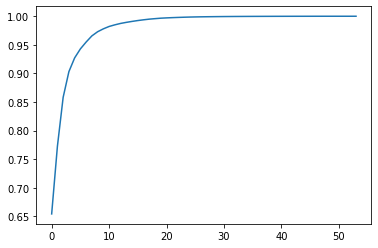

In [ ]:
# CODO

# representacion conjunto de datos en componentes principales----
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [ ]:
pca_10 = PCA(n_components = 10)
mb_PC_10 = pca_10.fit_transform(mb)

# representacion conjunto de datos en componentes principales----
mb_PC_10_df = pd.DataFrame(data = mb_PC_10
             , columns = ["PC1","PC2","PC3","PC4","PC5","PC6",
             "PC7","PC8","PC9","PC10"])

# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_10_df.head())

        PC1       PC2       PC3  ...       PC8       PC9      PC10
0 -1.306603 -0.034829  0.229271  ...  0.076533  0.342417  0.326693
1  0.081369 -1.001265 -0.069101  ... -0.023822 -0.301291  0.193222
2  4.451763 -2.034792 -1.154947  ...  0.767979  0.102949 -0.160447
3  2.773560  5.209073 -0.228254  ...  1.025534 -0.169929 -0.091042
4  0.399323 -0.036426  0.743607  ...  0.159049  0.257652 -0.204033

[5 rows x 10 columns]


In [ ]:
# KAISER

# varianza explicada por las componentes principales-------------
print(pca.explained_variance_)

[5.84872221e+00 1.05790845e+00 7.66425862e-01 4.01494632e-01
 2.15143824e-01 1.40744171e-01 1.07283396e-01 9.62361612e-02
 6.48560252e-02 4.55179986e-02 3.70430685e-02 2.56498178e-02
 2.19537913e-02 1.67681207e-02 1.48803821e-02 1.35099273e-02
 1.15973971e-02 1.03174920e-02 7.72900828e-03 7.23291227e-03
 4.67402620e-03 3.89828546e-03 3.39624355e-03 3.03194635e-03
 2.60752176e-03 2.01761435e-03 1.71799921e-03 1.26013130e-03
 1.08063293e-03 1.04089365e-03 8.16124437e-04 6.74288266e-04
 6.18257255e-04 5.01293164e-04 4.37037767e-04 3.48098143e-04
 3.09660937e-04 2.86711057e-04 2.63970086e-04 2.43947744e-04
 2.09306948e-04 1.67425315e-04 1.45065145e-04 1.36099730e-04
 1.08984568e-04 1.00432940e-04 8.66483123e-05 6.71393247e-05
 5.78003665e-05 3.86637955e-05 3.28229291e-05 2.29676116e-05
 2.21659187e-05 1.02659380e-05]


In [ ]:
pca_2 = PCA(n_components = 2)
mb_PC_2 = pca_2.fit_transform(mb)
# representacion conjunto de datos en componentes principales----
mb_PC_2_df = pd.DataFrame(data = mb_PC_2
             , columns = ["PC1","PC2"])
# primeras observaciones del nuevo conjunto de datos-------------
print(mb_PC_2_df.head())

        PC1       PC2
0 -1.306603 -0.034829
1  0.081369 -1.001265
2  4.451763 -2.034792
3  2.773560  5.209073
4  0.399323 -0.036426
